In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('california_housing_train.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
data.shape

(17000, 9)

In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [8]:
col_list = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

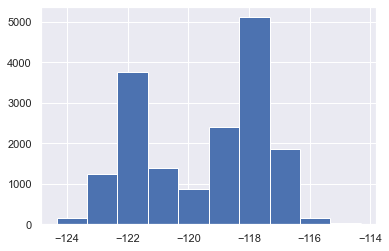

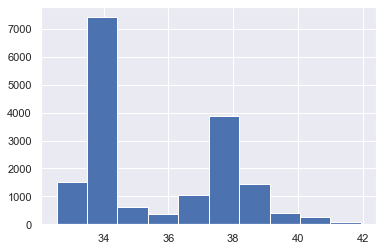

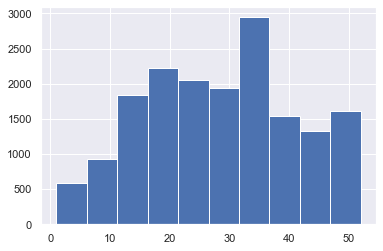

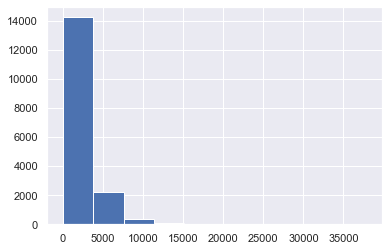

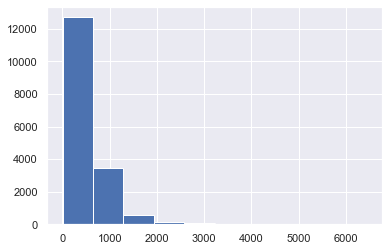

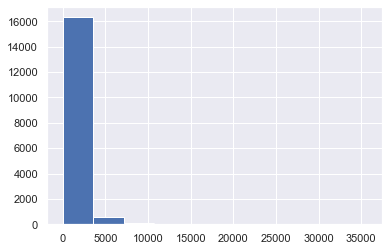

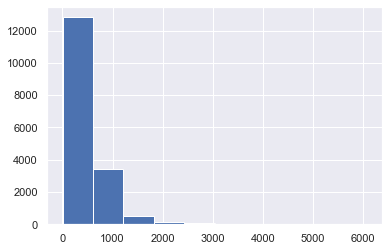

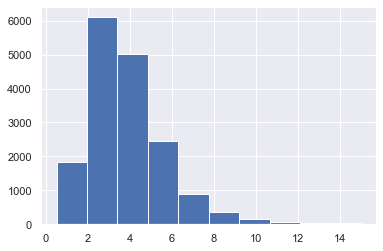

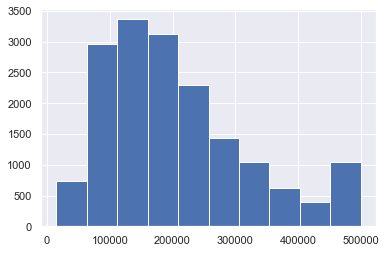

In [9]:
for i in col_list:
    plt.hist(data[i])
    plt.show()

In [10]:
corr_df = data.corr('spearman')

In [11]:
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879422,-0.155513,0.042930,0.066928,0.127279,0.064688,-0.010154,-0.069728
latitude,-0.879422,1.000000,0.036253,-0.021992,-0.059780,-0.126854,-0.078505,-0.089768,-0.167714
housing_median_age,-0.155513,0.036253,1.000000,-0.356544,-0.307599,-0.285526,-0.281980,-0.143134,0.075706
total_rooms,0.042930,-0.021992,-0.356544,1.000000,0.914076,0.816112,0.906199,0.266565,0.204217
total_bedrooms,0.066928,-0.059780,-0.307599,0.914076,1.000000,0.872507,0.975970,-0.012730,0.082801
population,0.127279,-0.126854,-0.285526,0.816112,0.872507,1.000000,0.904726,-0.002122,-0.000781
households,0.064688,-0.078505,-0.281980,0.906199,0.975970,0.904726,1.000000,0.023498,0.108806
median_income,-0.010154,-0.089768,-0.143134,0.266565,-0.012730,-0.002122,0.023498,1.000000,0.680814
median_house_value,-0.069728,-0.167714,0.075706,0.204217,0.082801,-0.000781,0.108806,0.680814,1.000000


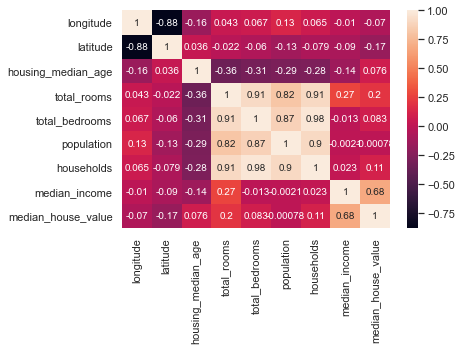

In [12]:
sns.heatmap(corr_df,annot=True);

In [13]:
y = data['median_house_value']
x = data.drop(['median_house_value'],axis = 1)

In [14]:
x_const = sm.add_constant(x)

In [15]:
x_const

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,1.0,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,1.0,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,1.0,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,1.0,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...,...
16995,1.0,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,1.0,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,1.0,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,1.0,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [16]:
sm_model = sm.OLS(y,x_const).fit()

In [17]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3798.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:12:20   Log-Likelihood:            -2.1365e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16991   BIC:                         4.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.621e+06   6.92e+04    -52.312      0.000   -3.76e+06   -3.48e+06
longitude          -4.314e+04    789.568    -54.637      0.000   -4.47e+04   -4.16e+04
latitude           -4.293e+04    745.804    -57.556      0.000   -4.44e+04   -4.15e+04
housing_median_age  1150.6949     47.577     24.186      0.000    1057.438    1243.951
total_rooms           -8.3783      0.863     -9.711      0.000     -10.069      -6.687
total_bedrooms       117.6485      7.687     15.305      0.000     102.582     132.715
population           -38.4888      1.186    -32.456      0.000     -40.813     -36.164
households            45.4360      8.445      5.380      0.000      28.883      61.989
median_income       4.051e+04    368.172    110.022      0.000    3.98e+04    4.12e+04
==============================================================================
Omnibus:                     4032.682   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15559.395
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.094   Cond. No.                     5.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr_model.score(x,y)

0.6413378529502689

In [21]:
lr_model.coef_

array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])

In [22]:
lr_model.intercept_

-3620600.8929739404